In [1]:
import gym
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
env = gym.make("CartPole-v1")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
#Environment values
print(env.observation_space.high)
print(env.observation_space.low)
print(env.action_space.n)

[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
2


In [4]:
#Hyperparamters
EPISODES = 10000
DISCOUNT = 0.95
EPISODE_DISPLAY = 500
LEARNING_RATE = 0.25
EPSILON = 0.2

In [5]:
#Q-Table of size theta_state_size*theta_dot_state_size*env.action_space.n
theta_minmax = env.observation_space.high[2]
theta_dot_minmax = math.radians(50)
theta_state_size = 50
theta_dot_state_size = 50
Q_TABLE = np.random.randn(theta_state_size,theta_dot_state_size,env.action_space.n)

In [6]:
# For stats
ep_rewards = []
ep_rewards_table = {'ep': [], 'avg': [], 'min': [], 'max': []}
deviations = []  # List to store deviations

In [7]:
def discretised_state(state):
    # state[2] -> theta
    # state[3] -> theta_dot
    discrete_state = np.array([0, 0])  # Initialised discrete array
    theta_window = (theta_minmax - (-theta_minmax)) / theta_state_size
    discrete_state[0] = (state[2] - (-theta_minmax)) // theta_window
    discrete_state[0] = min(theta_state_size-1, max(0, discrete_state[0]))

    theta_dot_window = (theta_dot_minmax - (-theta_dot_minmax)) / theta_dot_state_size
    discrete_state[1] = (state[3] - (-theta_dot_minmax)) // theta_dot_window
    discrete_state[1] = min(theta_dot_state_size-1, max(0, discrete_state[1]))

    return tuple(discrete_state.astype(int))

In [8]:
# SARSA Implementation
for episode in range(EPISODES):
    episode_reward = 0
    done = False

    initial_state = env.reset()
    initial_position = initial_state[0]  # Record the initial position

    if episode % EPISODE_DISPLAY == 0:
        render_state = True
    else:
        render_state = False

    curr_discrete_state = discretised_state(initial_state)
    if np.random.random() > EPSILON:
        action = np.argmax(Q_TABLE[curr_discrete_state])
    else:
        action = np.random.randint(0, env.action_space.n)

    while not done:
        new_state, reward, done, _ = env.step(action)
        new_discrete_state = discretised_state(new_state)

        if np.random.random() > EPSILON:
            new_action = np.argmax(Q_TABLE[new_discrete_state])
        else:
            new_action = np.random.randint(0, env.action_space.n)

        if render_state:
            env.render()

        if not done:
            current_q = Q_TABLE[curr_discrete_state+(action,)]
            max_future_q = Q_TABLE[new_discrete_state+(new_action,)]
            new_q = current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q - current_q)
            Q_TABLE[curr_discrete_state+(action,)] = new_q

        curr_discrete_state = new_discrete_state
        action = new_action

        episode_reward += reward

    final_position = new_state[0]  # Record the final position
    deviations.append(final_position - initial_position)  # Compute the deviation

    ep_rewards.append(episode_reward)

    if not episode % EPISODE_DISPLAY:
        avg_reward = sum(ep_rewards[-EPISODE_DISPLAY:]) / len(ep_rewards[-EPISODE_DISPLAY:])
        ep_rewards_table['ep'].append(episode)
        ep_rewards_table['avg'].append(avg_reward)
        ep_rewards_table['min'].append(min(ep_rewards[-EPISODE_DISPLAY:]))
        ep_rewards_table['max'].append(max(ep_rewards[-EPISODE_DISPLAY:]))
        print(f"Episode:{episode} avg:{avg_reward} min:{min(ep_rewards[-EPISODE_DISPLAY:])} max:{max(ep_rewards[-EPISODE_DISPLAY:])}")

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Episode:0 avg:30.0 min:30.0 max:30.0
Episode:500 avg:17.412 min:8.0 max:74.0
Episode:1000 avg:15.236 min:8.0 max:66.0
Episode:1500 avg:18.228 min:8.0 max:66.0
Episode:2000 avg:26.31 min:8.0 max:189.0
Episode:2500 avg:49.254 min:8.0 max:350.0
Episode:3000 avg:66.5 min:8.0 max:500.0
Episode:3500 avg:92.168 min:9.0 max:500.0
Episode:4000 avg:125.186 min:9.0 max:500.0
Episode:4500 avg:172.658 min:10.0 max:500.0
Episode:5000 avg:200.19 min:8.0 max:500.0
Episode:5500 avg:204.196 min:9.0 max:500.0
Episode:6000 avg:261.472 min:9.0 max:500.0
Episode:6500 avg:265.668 min:10.0 max:500.0
Episode:7000 avg:268.552 min:10.0 max:500.0
Episode:7500 avg:296.678 min:11.0 max:500.0
Episode:8000 avg:276.378 min:12.0 max:500.0
Episode:8500 avg:299.834 min:10.0 max:500.0
Episode:9000 avg:313.332 min:11.0 max:500.0
Episode:9500 avg:310.4 min:11.0 max:500.0


In [9]:
env.close()

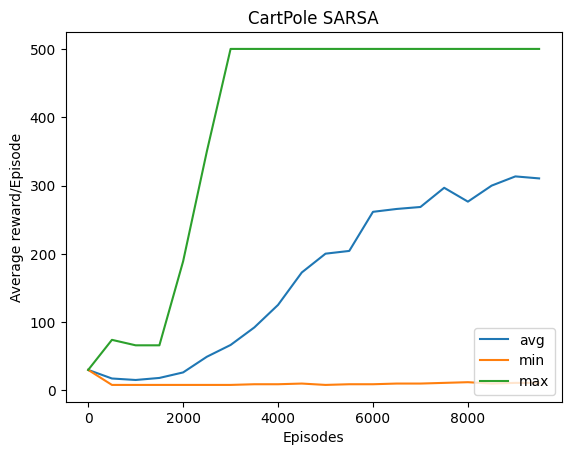

In [10]:
plt.plot(ep_rewards_table['ep'], ep_rewards_table['avg'], label="avg")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['min'], label="min")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['max'], label="max")
plt.legend(loc=4) #bottom right
plt.title('CartPole SARSA')
plt.ylabel('Average reward/Episode')
plt.xlabel('Episodes')
plt.show()

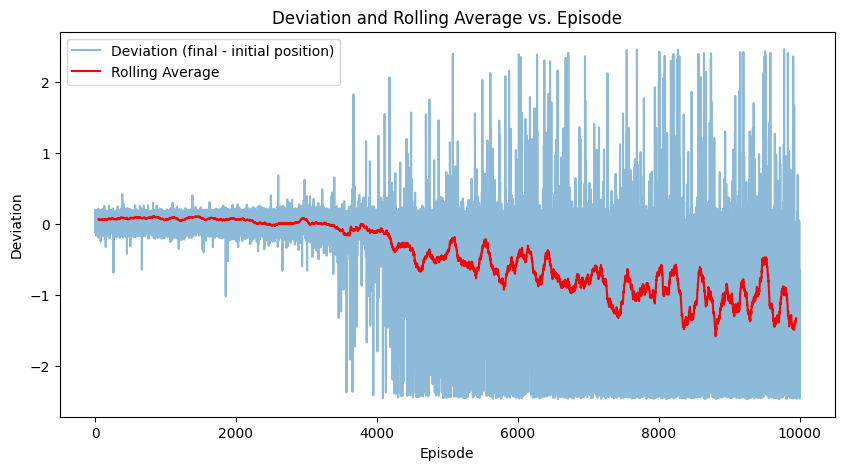

In [15]:
# Assuming `deviations` is your list containing the deviation data
deviations = np.array(deviations)  # Make sure deviations is a NumPy array for easier processing

# Set the window size for the rolling average
window_size = 100  # You can adjust this based on how smooth you want the curve to be

# Calculate the rolling average
rolling_avg = np.convolve(deviations, np.ones(window_size)/window_size, mode='valid')

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(deviations, label='Deviation (final - initial position)', alpha=0.5)  # Original data with some transparency
plt.plot(range(window_size // 2, len(deviations) - window_size // 2 + 1), rolling_avg, label='Rolling Average', color='red')  # Rolling average
plt.xlabel('Episode')
plt.ylabel('Deviation')
plt.title('Deviation and Rolling Average vs. Episode')
plt.legend()
plt.show()